## Introduction ##
This project investigates whether or not there there is a correlation between GDP (monetary measure of the market value of all the 
final goods and services produced in a specific time period, by a country), and the life expectancy of its citizens.

There are six nations in the dataset:
~ Chile
~ China
~ Germany
~ Mexico
~ United States of America
~ Zimbabwe

The goals are to:
~  clean the data, 
~  analyze the data, using plots and graphs
~  sum up the findings from the study

Here are some more questions that this project seeks to answer:

    ~ What is the average life expectancy?

    ~ What is the distribution of that life expectancy?

    ~ Has life expectancy increased over time?

    ~ Has a country's GDP increased over time?

    ~ What is a country's average GDP over the years?

    ~ As GDP goes up, does life expectancy also go up?

~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~

Data sources:
GDP Source: World Bank national accounts data, and OECD National Accounts data files.
Life expectancy Data Source: World Health Organization


## Import Python Modules ##

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from IPython.display import Image
import matplotlib.ticker
from scipy.stats import pearsonr

## Load in the data. ##

In [2]:
df = pd.read_csv("all_data.csv")

In [3]:
Image(url="dog_with_glasses.jpeg", width=300, height=300) 

## Inspect the dataset ##

In [4]:
#Display the first 5 rows, to get a general idea of the dataset. Look at headers. 
df.head(5)
#df.info()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
#also display the last 5 rows. Then look at more of the tail.
df.tail

<bound method NDFrame.tail of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

In [6]:
#Get the column names
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

In [7]:
#Discover how many rows and how many columns there are.
df.shape

(96, 4)

In [8]:
#Another method to discover how many rows there are.
len(df)

96

In [9]:
#Get the size of the dataset ( 96 rows times 4 columns = 384 )
df.size

384

## What data types are the variables? ##

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Is any data missing? ##

In [11]:
df.count()

Country                             96
Year                                96
Life expectancy at birth (years)    96
GDP                                 96
dtype: int64

In [12]:
missing_count = df.isnull().sum()
print(missing_count)

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


### No. Nothing is missing. Really. ###

In [13]:
Image(url="dogs_tray_cookies.jpeg", width=300, height=300) 

In [14]:
#Change the column name from "Life Expectancy at Birth" to "LE"
df = df.rename({"Life expectancy at birth (years)":"LE"}, axis = "columns")
df.head()

,Country,Year,LE,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Convert the Year column to type int, to prevent Year from  printing out in decimals. ###

In [15]:
df['Year'] = df['Year'].astype(str).apply(lambda x: x.replace('.0',''))

### Convert scientific notation to decimal. ###

In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.head()

,Country,Year,LE,GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00


In [17]:
print(df.GDP)

0    77860932152.00
1    70979923960.00
2    69736811435.00
3    75643459840.00
4    99210392858.00
          ...      
91   12098450749.00
92   14242490252.00
93   15451768659.00
94   15891049236.00
95   16304667807.00
Name: GDP, Length: 96, dtype: float64


### Change the GDP to read as trillions. ###

In [18]:
GDP_new_list = []
for i in df.GDP:
    GDP_new_list.append(i * .000000000001)

In [19]:
print("In trillions: " '\n')
print(GDP_new_list)

In trillions: 

[0.077860932152, 0.07097992396, 0.069736811435, 0.07564345984, 0.099210392858, 0.12296499999999999, 0.154788, 0.173606, 0.179638, 0.172389, 0.21853799999999998, 0.252252, 0.26712199999999997, 0.278384, 0.26099, 0.24251799999999998, 1.21135, 1.3394, 1.47055, 1.66029, 1.95535, 2.28597, 2.7521299999999997, 3.55218, 4.59821, 5.1099499999999995, 6.10062, 7.57255, 8.56055, 9.60722, 10.4824, 11.0647, 1.9499499999999999, 1.95065, 2.0791399999999998, 2.50573, 2.81925, 2.86141, 3.00245, 3.43995, 3.75237, 3.4180099999999998, 3.41709, 3.7577, 3.54398, 3.75251, 3.89061, 3.37561, 0.683648, 0.724704, 0.74156, 0.713284, 0.770268, 0.866346, 0.965281, 1.04347, 1.10128, 0.894949, 1.05113, 1.17119, 1.1865999999999999, 1.2619799999999999, 1.29846, 1.15226, 10.299999999999999, 10.6, 11.0, 11.5, 12.299999999999999, 13.1, 13.9, 14.5, 14.7, 14.4, 15.0, 15.5, 16.2, 16.7, 17.4, 18.099999999999998, 0.0066899576, 0.0067773847, 0.0063421164, 0.0057275918, 0.0058055984, 0.0057552152, 0.0054438965, 0.

In [20]:
GDP_decimal = [round(x, 3) for x in GDP_new_list]

In [21]:
print("GDP in trillions, with number rounded to three decimals: " '\n')
print(GDP_decimal)

GDP in trillions, with number rounded to three decimals: 

[0.078, 0.071, 0.07, 0.076, 0.099, 0.123, 0.155, 0.174, 0.18, 0.172, 0.219, 0.252, 0.267, 0.278, 0.261, 0.243, 1.211, 1.339, 1.471, 1.66, 1.955, 2.286, 2.752, 3.552, 4.598, 5.11, 6.101, 7.573, 8.561, 9.607, 10.482, 11.065, 1.95, 1.951, 2.079, 2.506, 2.819, 2.861, 3.002, 3.44, 3.752, 3.418, 3.417, 3.758, 3.544, 3.753, 3.891, 3.376, 0.684, 0.725, 0.742, 0.713, 0.77, 0.866, 0.965, 1.043, 1.101, 0.895, 1.051, 1.171, 1.187, 1.262, 1.298, 1.152, 10.3, 10.6, 11.0, 11.5, 12.3, 13.1, 13.9, 14.5, 14.7, 14.4, 15.0, 15.5, 16.2, 16.7, 17.4, 18.1, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.004, 0.009, 0.01, 0.012, 0.014, 0.015, 0.016, 0.016]


### Create a new column in the dataset for GDP(in decimals). ###

In [22]:
df['GDP_dec'] = GDP_decimal
print(df.head(6))

  Country  Year    LE             GDP  GDP_dec
0   Chile  2000 77.30  77860932152.00     0.08
1   Chile  2001 77.30  70979923960.00     0.07
2   Chile  2002 77.80  69736811435.00     0.07
3   Chile  2003 77.90  75643459840.00     0.08
4   Chile  2004 78.00  99210392858.00     0.10
5   Chile  2005 78.40 122965000000.00     0.12


# Done inspecting and cleaning the data. Now time to analyze. #

## What countries are represented? ##

In [23]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


## How many years are represented? ##

In [24]:
#print(df.Year.unique())

years = ()
years= df.Year.unique()
print(years)
print('\n')
print("There are " + str(len(years)) + " years represented in this dataset.")

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015']


There are 16 years represented in this dataset.


## What is the Life Expectancy of all 6 countries? What is the distribution of that data? ##

Text(0.5, 1.0, 'Life Expectancy at Birth\n From All 6 Countries')

<Figure size 800x600 with 0 Axes>

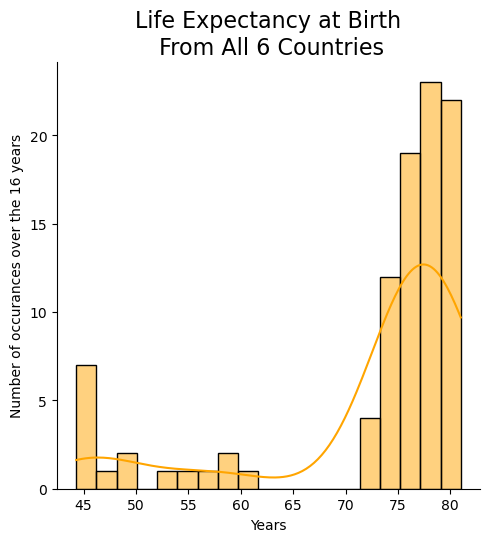

In [25]:
#Life expectancy at birth, over the years.  
#Create a swarm plot
plt.figure(figsize=(8,6))
sns.displot(df.LE, rug =False, kde=True, color ='orange')
plt.xlabel("Years")
plt.ylabel("Number of occurances over the 16 years")
plt.title("Life Expectancy at Birth\n From All 6 Countries", size=16)

### Most of the countrys' life expectancies are between 73-81 years old. ###
### The Life Expectancy data is left-skewed. ###

## What is the average Life Expectancy of all 6 countries? ##

In [26]:
#print(df.LE.mean)
avg_LE_allYears = df.LE.groupby(df.Country).mean()
print("These are the Life Expectancy averages, of all years, for all countries: ")
print(avg_LE_allYears)

print('\n')
print("The average Life Expectancy of all countries is : ")
avg_LE_total = sum(avg_LE_allYears) / 6
print(round(avg_LE_total,2))

These are the Life Expectancy averages, of all years, for all countries: 
Country
Chile                      78.94
China                      74.26
Germany                    79.66
Mexico                     75.72
United States of America   78.06
Zimbabwe                   50.09
Name: LE, dtype: float64


The average Life Expectancy of all countries is : 
72.79


### The average life expectancy, of all countries combined, is 72.8 years. ###

## Has Life Expectancy increased over the years? ##

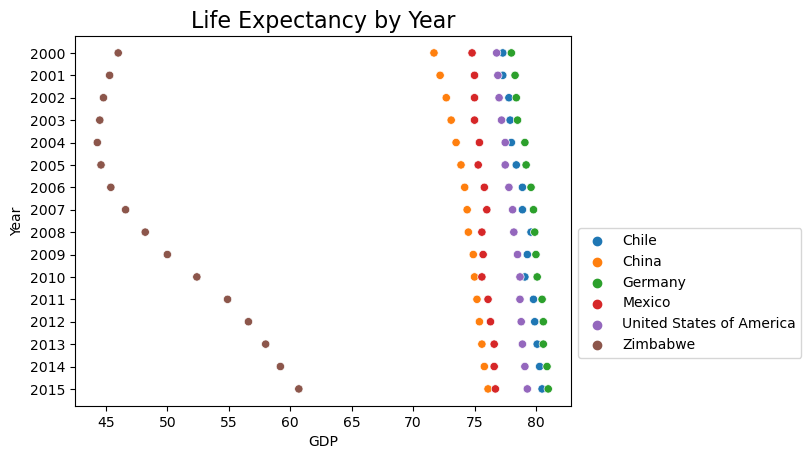

In [27]:
sns.scatterplot(data = df, x = df.LE , y = df.Year, hue = "Country")

plt.legend(loc='center')
plt.legend(loc='center')
plt.xlabel("GDP")
plt.ylabel("Year")
plt.title("Life Expectancy by Year", size=16)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

### Life Expectancy has increased, over the years, for all 6 of these countries, ###
### with Zimbabwe having the largest increase, going from 46 years to 61 years. ###

In [28]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

Text(0.5, 1.0, 'Averages for Life Expectancy, per Country')

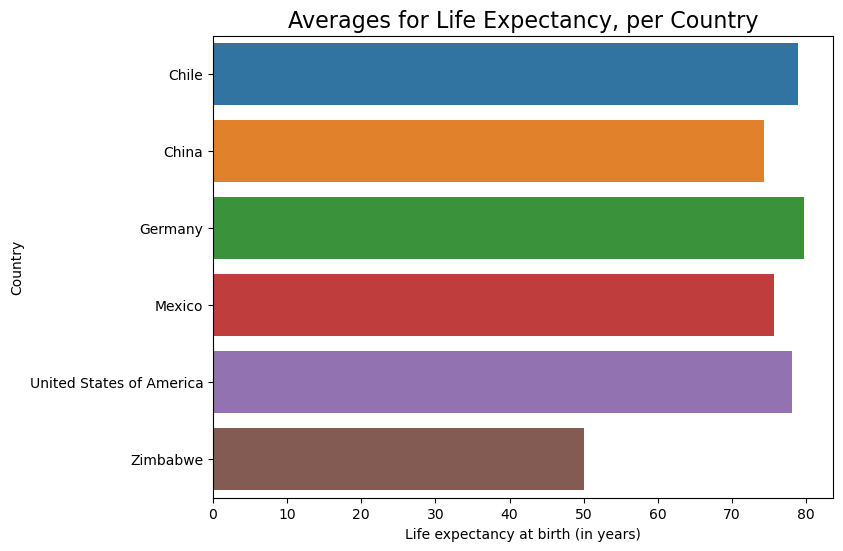

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x="LE", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (in years)")
plt.title("Averages for Life Expectancy, per Country", size=16)

### These are the averages, for life expectancies, per country. ###
### This is hard to read though. Let's look at a different graph. ###

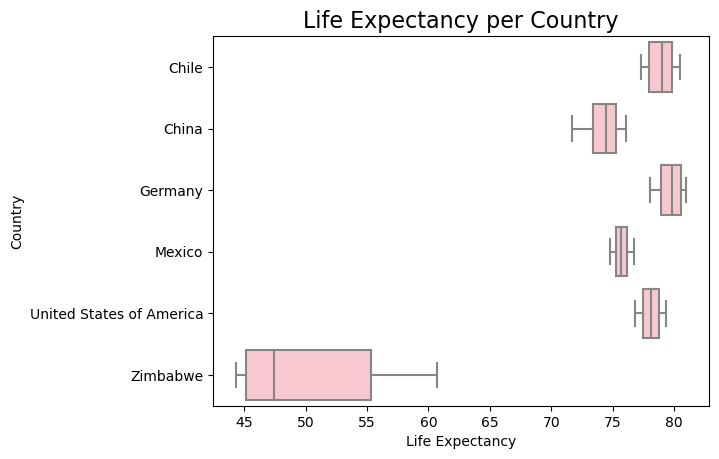

In [30]:
sns.boxplot(data = df, x = df.LE , y = df.Country, color = "pink")
plt.xlabel("Life Expectancy")
plt.title("Life Expectancy per Country", size=16)
plt.show()

### This box plot is easier to read. ###
### Germany has the highest life expectancy.  Chile is a very close 2nd. Zimbabwe has the lowest life expectancy. ###

## What is the GDP per country ? ###

Text(0.5, 1.0, 'GDP\n From All 6 Countries')

<Figure size 800x600 with 0 Axes>

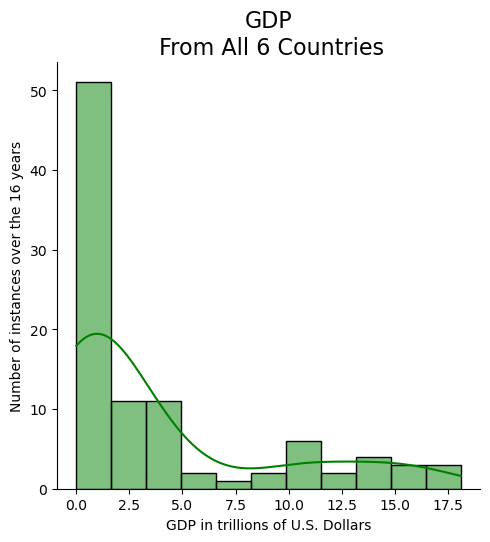

In [31]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP_dec, rug = False, kde=True, color = 'green')
plt.xlabel("GDP in trillions of U.S. Dollars")
plt.ylabel("Number of instances over the 16 years")
plt.title("GDP\n From All 6 Countries", size=16)

In [32]:
### This GDP distribution is right-skewed. ###

In [33]:
#print(df.LE.mean)
avg_GDP_allYears = df.GDP_dec.groupby(df.Country).mean()
print("These are the GDP averages, in trillions, of all 16 years: " + '\n')
print(avg_GDP_allYears)

These are the GDP averages, in trillions, of all 16 years: 

Country
Chile                       0.17
China                       4.96
Germany                     3.09
Mexico                      0.98
United States of America   14.07
Zimbabwe                    0.01
Name: GDP_dec, dtype: float64


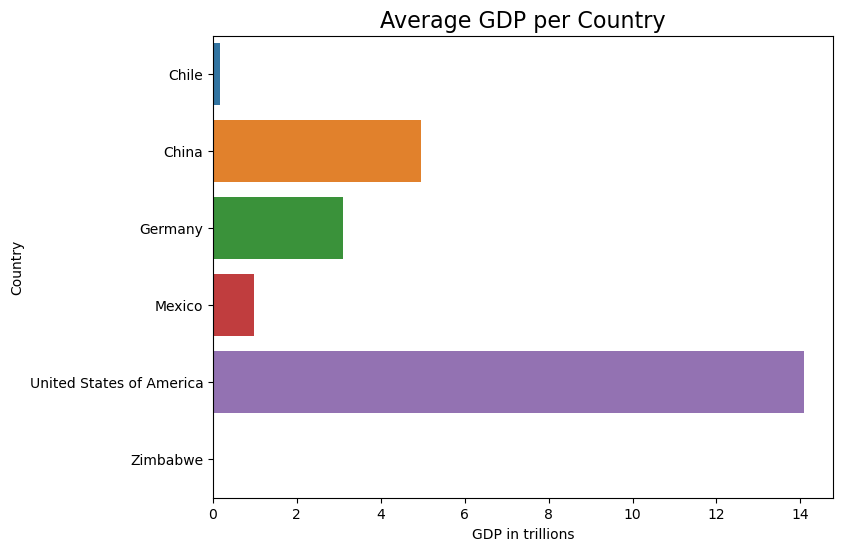

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP_dec", y="Country", data=dfMeans)
plt.xlabel("GDP in trillions")
plt.title("Average GDP per Country", size=16);

### Zimbabwe's GDP is so low, it does not even register on this bar graph. Let's look at a boxplot of GDP now. ###

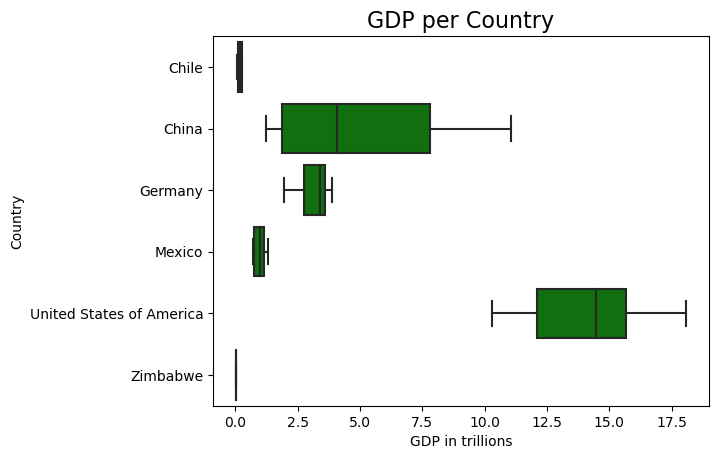

In [35]:
sns.boxplot(data = df, x = "GDP_dec", y = df.Country, color = "green")
plt.xlabel("GDP in trillions")
plt.title("GDP per Country", size =16)
plt.show()

### USA has the highest GDP. China has the 2nd highest GDP. However, USA's lowest GDP outlier, ###
### is about the same as China's highest GDP outlier. ### 
### Zimbabwe's GDP is so low that it does not even show up on the bar chart. ###

## What is the GDP per year? ##

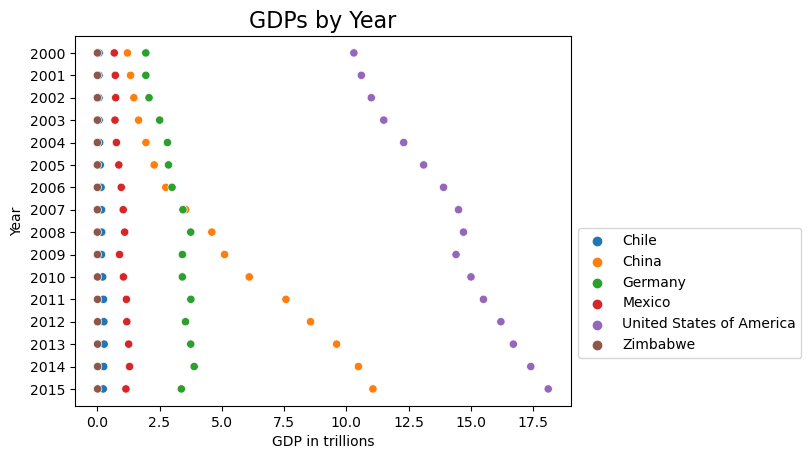

In [36]:
sns.scatterplot(data = df, x = "GDP_dec", y = df.Year, hue = "Country")

plt.legend(loc='best', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel("GDP in trillions")
plt.ylabel("Year")
plt.title("GDPs by Year", size =16)
plt.show()

## What is GDP vs Life Expectancy? ##

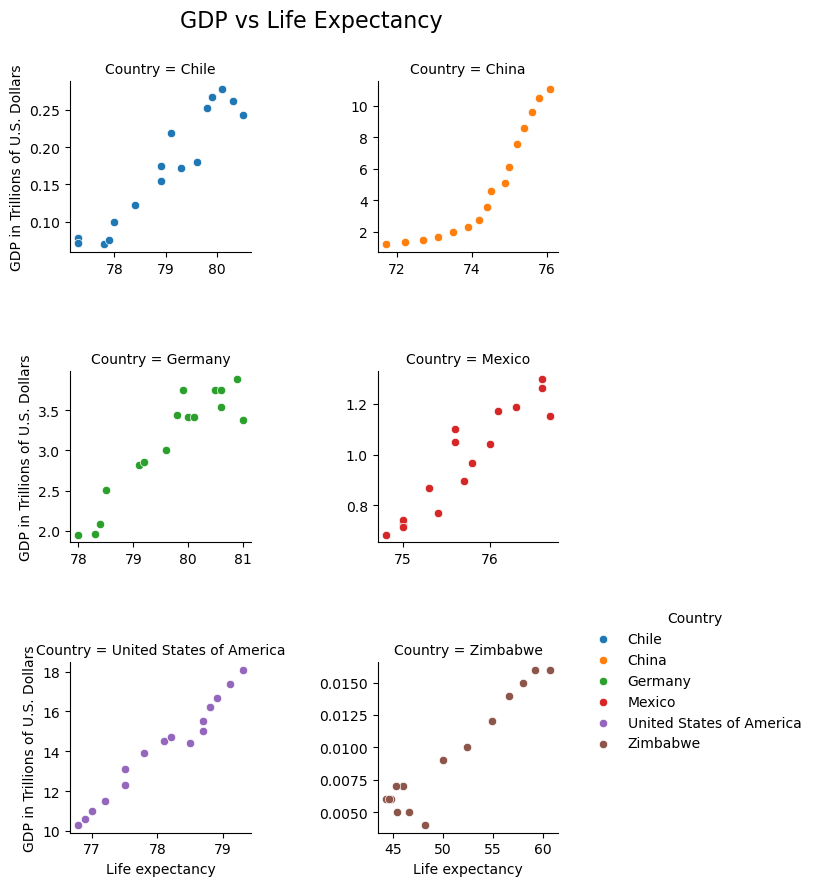

In [37]:
graph = sns.FacetGrid(df, col="Country", col_wrap=2,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LE", "GDP_dec")
         .add_legend(bbox_to_anchor=(1.02, 0.15), loc='lower right', borderaxespad=0)
         .set_axis_labels("Life expectancy", "GDP in Trillions of U.S. Dollars"));
plt.subplots_adjust(hspace=0.7, wspace=0.7)

graph.fig.suptitle('GDP vs Life Expectancy                   ', size=16)
graph.fig.subplots_adjust(top=.9)

### There is a positive correlation between life expectancy and GDP. ###
### As GDP goes up, so does life expectancy. ###

### ... ###
## Now let's look at life expectancy vs Year ##

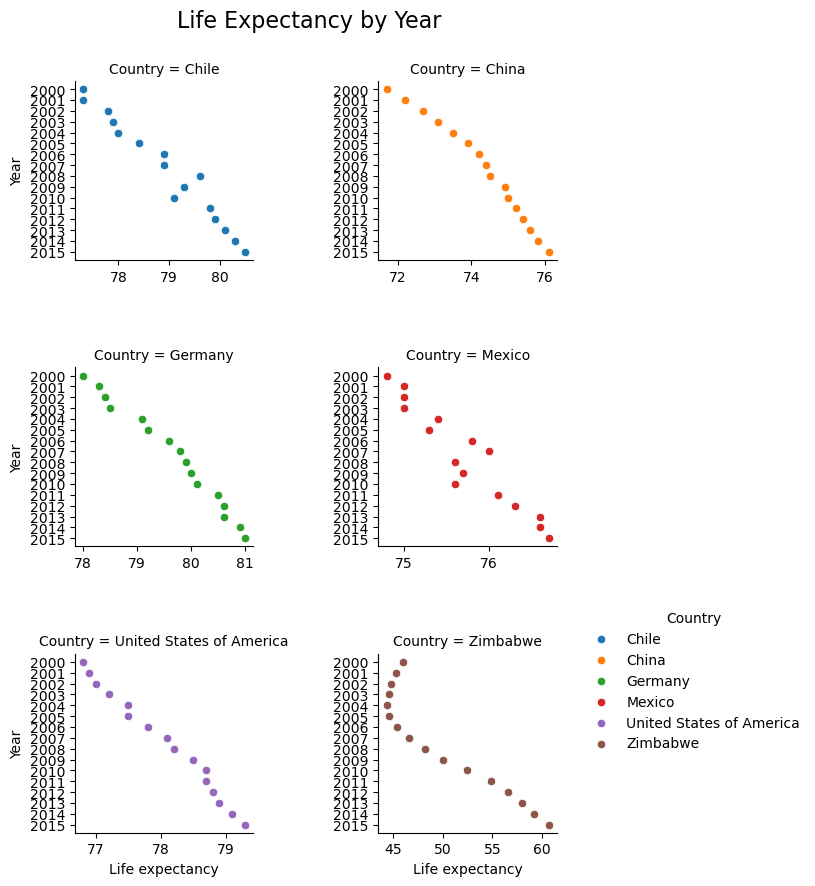

In [38]:

graph = sns.FacetGrid(df, col="Country", col_wrap=2,
                      hue = "Country", sharey = False, sharex = False)
#df['Year'] = df['Year'].astype(str).apply(lambda x: x.replace('.0',''))
graph = (graph.map(sns.scatterplot,"LE", "Year")
         .add_legend(bbox_to_anchor=(1.02, 0.15), loc='lower right', borderaxespad=0)
         .set_axis_labels("Life expectancy", "Year"));
plt.subplots_adjust(hspace=0.6, wspace=0.7)

graph.fig.suptitle('Life Expectancy by Year                   ', size=16)
graph.fig.subplots_adjust(top=.9)

### As GDP goes up, the Life Expectancy of a country goes up.  This is the case for all but Zimbabwe ###
### where the life expectancy went down briefly, from the years 2001-2005, even though GDP went up. ###

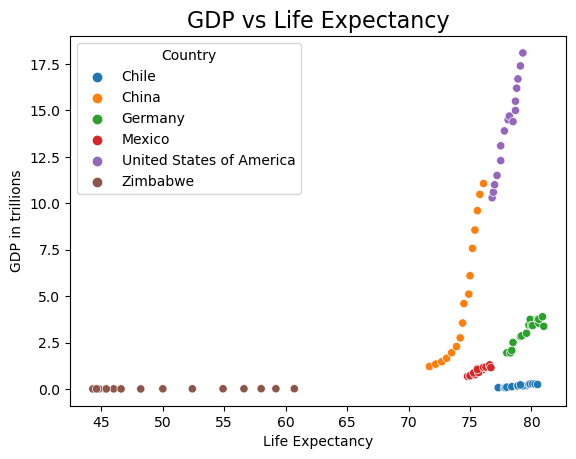

In [39]:
sns.scatterplot(data = df, x = df.LE, y = "GDP_dec", hue = "Country")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP in trillions")
plt.title("GDP vs Life Expectancy", size=16)
plt.show()

In [40]:
pearsonr(df.LE, df.GDP)

PearsonRResult(statistic=0.3432067484491559, pvalue=0.0006187129569469889)

In [44]:
df['LE'].corr(df['GDP'])

0.3432067484491559

In [45]:
## Comparing Life Expectancy vs GDP, the number .34 shows that there is a slight positive correlation. ##

### Single out Zimbabwe to have a closer look. ###

In [46]:
Zimbabwe = df[df["Country"] == "Zimbabwe"]
print(Zimbabwe)
print('\n')
print("Zimbabwe GDP in trillions" + '\n')

     Country  Year    LE            GDP  GDP_dec
80  Zimbabwe  2000 46.00  6689957600.00     0.01
81  Zimbabwe  2001 45.30  6777384700.00     0.01
82  Zimbabwe  2002 44.80  6342116400.00     0.01
83  Zimbabwe  2003 44.50  5727591800.00     0.01
84  Zimbabwe  2004 44.30  5805598400.00     0.01
85  Zimbabwe  2005 44.60  5755215200.00     0.01
86  Zimbabwe  2006 45.40  5443896500.00     0.01
87  Zimbabwe  2007 46.60  5291950100.00     0.01
88  Zimbabwe  2008 48.20  4415702800.00     0.00
89  Zimbabwe  2009 50.00  8621573608.00     0.01
90  Zimbabwe  2010 52.40 10141859710.00     0.01
91  Zimbabwe  2011 54.90 12098450749.00     0.01
92  Zimbabwe  2012 56.60 14242490252.00     0.01
93  Zimbabwe  2013 58.00 15451768659.00     0.01
94  Zimbabwe  2014 59.20 15891049236.00     0.02
95  Zimbabwe  2015 60.70 16304667807.00     0.02


Zimbabwe GDP in trillions



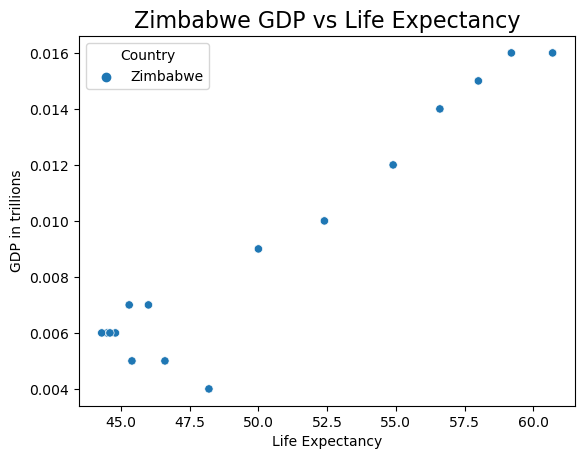

In [47]:
sns.scatterplot(data = Zimbabwe, x = "LE", y = Zimbabwe.GDP_dec, hue = "Country")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP in trillions")
plt.title("Zimbabwe GDP vs Life Expectancy", size=16)
plt.show()

### In conclusion, there is a positive correlation between life expectancy and a country's GDP. ###
### As GDP goes up, for a country, the citizen's life expectancy also goes up. ###
### Zimbabwe has the lowest GDP, by far, and also has the lowest life expectancy, by far. ###

## Further research ##

### This is a very interesting and unique article on Life Expectancy vs GDP. ###
### https://www.mckinsey.com/mgi/our-research/pixels-of-progress-chapter-2 ###

### What happened in Zimbabwe in the years 2000-2005?  ###
### https://en.wikipedia.org/wiki/2000s_in_Zimbabwe ###

In [48]:
Image(url="dog-scientist-resize.jpeg", width=300, height=300) 